In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?
# Answer : We can't guarantee how many elixirs one person would  get. It's possible, though unlikely, that a player who is very lucky 
# gets 100 elixirs out of 100 lootboxes. It's also possible, though unlikely, that a player who is very unlucky gets none. 
# The expected value is 15 BUT that doesn't in anyway mean every player gets 15 out of every 100 lootboxes

# Expected Value (EV) is the avg outcome of an event if repeated many times
# It's calculated by multiplying each possible outcome by it's possiblitly and summing 
# these product together.
# EV helps predict long-term results in situation involving chance

def calculate_elixir_ev(elixir_probability, num_boxes):
    return elixir_probability * num_boxes

elixir_prob = 0.15
nothing_prob = 0.85
num_lootboxes = 100

expected_elixirs = calculate_elixir_ev(elixir_prob, num_lootboxes)
print(f'Expected number of elixirs from {num_lootboxes} loot boxes: {elixir_prob}')

# EV and probability differ in that:
# Probability measurs the likelihood  of a specific outcome occurring, expressed as a number between 0 and 1 or as a percentage

# EV quantifies the avg result over many trails, often expressed in unit (items, dollars, units)

Expected number of elixirs from 100 loot boxes: 0.15


In [9]:

## The Binomial distribution
loot_boxes = list(range(0,101))
# elixir 15% 
p_success = 0.15
number = 100
loot_boxes_distribution = stats.binom(number,p_success)


Expected elixirs 15.00


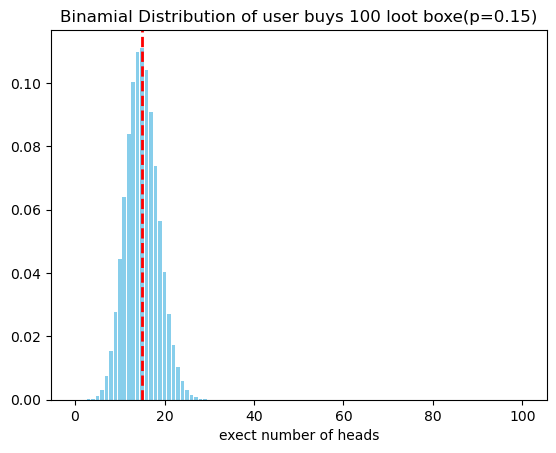

In [59]:
# PMF (Probabiltiy Mass Function) - Discrete distribution function returning the probability that a random var equal a SPECIFIC value
# CDF (Cummurative Distribution Function) - Probability that a random var is less than or equal to a given values
    # Discrete - As a step function (plt.step) It increases at each possible value of the random var
    # Continuous - It's the integral of the PDF from negative infinity to the given value

# PDF (Probability Density Function) - Continuous distribution function returning the realtive likelehood of a random variable taking on
# a given value..
plt.title('Binamial Distribution of user buys 100 loot boxe(p=0.15)')
plt.bar(loot_boxes,loot_boxes_distribution.pmf(loot_boxes),color='skyblue')
plt.xlabel('exect number of heads')

avg = loot_boxes_distribution.mean()
plt.axvline(avg, color='red', linestyle='dashed', linewidth=2)
print(f'Expected elixirs {avg:.2f}')

In [ ]:
# 2. Answer: S/O could theoretically purchase an infinite of lootboxes and never get an elixir.
# We can't guarantee how many lootboxes one would need to purchase until they find the elixir.

# BUT, if each box has a 15% chance of obtaining an elixir, regardless of previous lootboxes purchases or opening , then,
# ON AVG, a user would need to open about 7 lootboxes to get an elixir. 
# BUT, agian, this is just an avg. Some user will need fewer lootboxes to get an elixir and some will need more.
# The actual number for any given user can vary widely due to the RANDOM nature of the process.


In [ ]:
# 3. chance
# 3.A  
    # Discrete random variable - countable number of outcomes; distinct

    # Continuous ramdom variable - uncountable number of outcomes

    # X if discrete, can take on 1,2,3,4,5, etc. These are countable
    # We can't 2.5 lootboxes; we can't 3.7 lootboxes

# 3.B
    #Two outcomes: elixir (success) orno elixir (failure)
# Discrete uniform - each outcome is equally likely
# Bernoulli - number of successes in one trail. BUT we have 100 trails here..
# Binomial - number of success in n number of trails
# Poison - binomial + time

# The winner is Binomial

# 3.C
# PMF (Probabiltiy Mass Function) - Discrete distribution function returning the probability that a random var equal a SPECIFIC value
# Summation 
# For loop - why> range of values


In [19]:
#Best 
elixir_prob = 0.15
nothing_prob = 0.85
num_lootboxes = 100

X  = stats.binom(num_lootboxes,elixir_prob) # X is binomial distribution
P = 1 # counter - set the intial P
for x in range (20+1):
    P = P -X.pmf(x)
#running for loop to subtract probability of getting x elixirs where x is in 0,1,2,...,20

print(P)


0.06631976581888205


In [23]:
def calculate_elixir_probability():
    return sum(stats.binom.pmf(x, n=100, p=0.15) for x in range (21,101)) # >20 

result = calculate_elixir_probability()
print(f'The probability of getting more than 20 elixirs from 100 lootboxes is {result:.4f}')
               

The probability of getting more than 20 elixirs from 100 lootboxes is 0.0663


In [37]:
# Used the cdf.
print(f' Probability of getting more than 20 elixirs: {1-stats.binom.cdf(20,100,0.15):.4f}')

 Probability of getting more than 20 elixirs: 0.0663


In [47]:
#or
print(f' Probability of getting more than 20 elixirs: {(1-stats.binom.cdf(20,100,0.15))*100:.2f}%')

 Probability of getting more than 20 elixirs: 6.63%


In [ ]:
#3e:
# If a user were to earn or buy 100 lootboxes, there's about a ~6.6% chance that they get more than 20 elixirs

# Supporse there are 25,000 active users currently. If all 25,000 users earned 100 lootboxes, then we expect about 1,650 of those users 
# to get more 20 elixirs.
# 25_000*0.066

In [49]:
#4  Poisson Distribution - models the number of successes we observe in a fixed amount of time, 
# not a fixed amount of time

# The Poisson Distribution is often used to model count data, especially when the events are relative rare.
# and can occur any number of times within the given interval (last month).
# It's flexible enough to handle the varying probabilities we see in the data,unlike the discrete uniform or binomial distributions

#4B
revenue = 500_000
avg_purchase = 2.7
# number of user = revenue / avg_purchase
revenue / avg_purchase

185185.18518518517

In [55]:
#Floor Division
result = int(revenue // avg_purchase +1)
print(f'Number of users needed": {result:,}')

Number of users needed": 185,186


In [57]:
import math
math.ceil(revenue / avg_purchase)

185186

In [81]:
# round your answer up to nearest thousand -> rounding to 186,000

# round will round down effectivly BUT how shall we round UP?
round(revenue / avg_purchase , -3)

185000.0

In [ ]:
#4c [186,000]

# Set our total purchase amount to be 0
tot_purchase_amt =0

# Check values from 0 to 4

    # How many users purchase y loot boxes
#Assume = 186,000

    # How much money would we make from those people? dollar amt * num of individual

    # Add in the above quantity to amt

# How much we expect to make from ppl buying 4 or fewer lootboxes (low value users)

# How much we expect to make from ppl buying at least 5 lootboxes (high value users)


In [85]:
# Jay, Kel, and Cha-aim
import numpy as np

roundup = 186_000
outcomes = np.random.poisson(avg_purchase,int(roundup)) # Use poisson, when events occur independently and an event occurring in an interval.
high_value_users = [item for item in outcomes if item>=5] # Users who purchase >=5 items
total_high_value_users =sum(high_value_users) # Get expected money earned from high value users

low_value_users = sum(outcomes) - total_high_value_users 
total_low_value_users = low_value_users * 1

print(f'Money expect to earn from high value users is ${total_high_value_users:,}')
print(f'Money expect to earn from low value users is ${total_low_value_users:,}')

Money expect to earn from high value users is $144,498
Money expect to earn from low value users is $357,757


In [ ]:
#4d 
# Expected Revenue total / Expected revenue by user type
# Count of user types
# Avg number of loot boxes purchased by users 
# Total number of loot boxes purchased by users
# Ratio of low value user with high value users